In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm

from numpy import diff
from scipy.optimize import curve_fit
from random import randint

В одном измерении: 205 
Измерений: 15
#419.10.2020  /  18:41  /   Chernogolovka, Stolyarov V.S. ISSP, LS- SNL %     Name Factor Sample


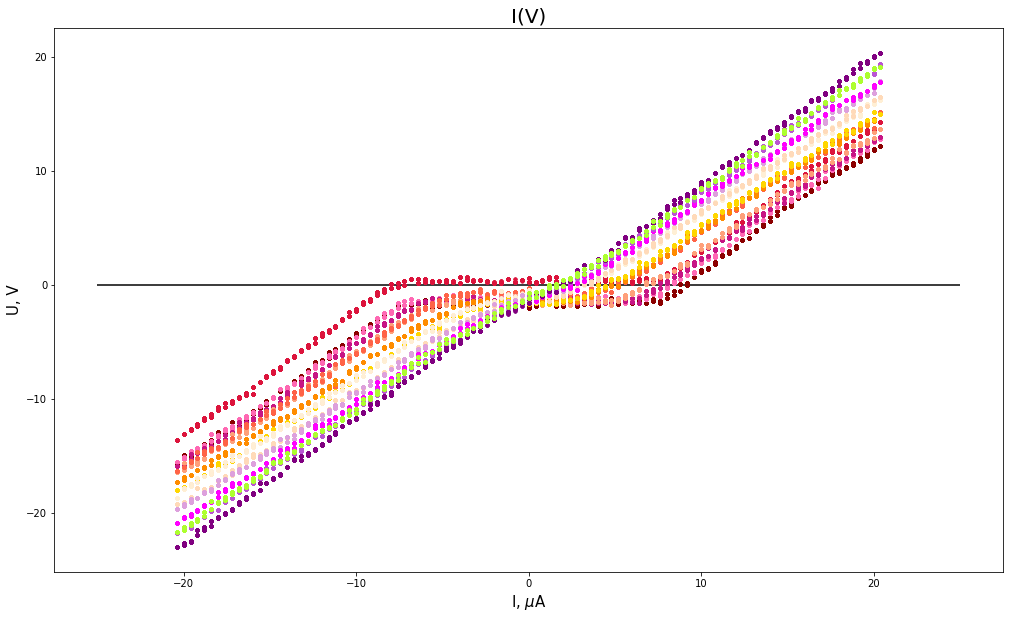

In [14]:
colors = ['#DC143C', '#8B0000', '#FF69B4', '#C71585', '#FFA07A', '#FF6347', '#FF8C00', '#FFD700', '#FFEFD5', 
          '#FFDAB9', '#DDA0DD', '#FF00FF', '#BA55D3', '#800080', '#ADFF2F', '#7CFC00', '#00FA9A', '#228B22', 
          '#556B2F', '#20B2AA', '#00FFFF', '#40E0D0', '#B0C4DE', '#ADD8E6', '#7B68EE', '#0000CD', '#191970', '#000000']

# путь до файла ( ... / ... )
f = open('C:/Users/mukha/Documents/НИРЪ/SNS/IVH/3D IVH 184148.dat','r') 


#считает количество строк
file_len = sum(1 for _ in f) - 1
f.seek(0)

#считает количество столбцов
Line_1 = f.readline()
Colomn = len(Line_1.split())


fig, ax = plt.subplots(figsize=(17,10))
plt.title('I(V)', fontsize=20)
ax.set_xlabel(r'I, $\mu$A' , fontsize=15)
ax.set_ylabel('U, V', fontsize=15)



c = 0
for i in range(1, Colomn, 6):
    f.seek(0)
    I = np.array([])
    V = np.array([])
    for line in f:
        if len(I) < file_len:
            line = line.replace('E', 'e')
            V = np.append(V, float(line.split()[i]))
            I = np.append(I, float(line.split()[i+1]))
            ax.plot(I, V*-1, ".", color = colors[c])
    c = c + 1
     
print('В одном измерении:', len(I), '\nИзмерений:', c)  
N_in = len(I)
N_exp = c
print(line)


ax.hlines(0, -25, 25, color = 'black')
plt.show()

In [3]:
f.seek(0)

# array of full measurments

I_2d = np.zeros((N_exp,N_in))
V_2d = np.zeros((N_exp,N_in))
H_2d = np.zeros((N_exp,N_in))
dV_dI = np.zeros((N_exp,N_in))

c = 0
a = 0
for i in range(1, Colomn, 6):
    f.seek(0)
    c = c + 1
    I = np.array([])
    V = np.array([])
    H = np.array([])
    
    for line in f:
        if len(I) < file_len:
            line = line.replace('E', 'e')
            V = np.append(V, float(line.split()[i]))
            I = np.append(I, float(line.split()[i+1]))
            H = np.append(H, float(line.split()[i+2]))
    
    for j in range(0, N_in-1):
        I_2d[a][j] = I[j]  
        V_2d[a][j] = V[j]  
        H_2d[a][j] = H[j]               
    a = a+1

  
print('Форма матрицы данных:', V_2d.shape)

Форма матрицы данных: (15, 205)


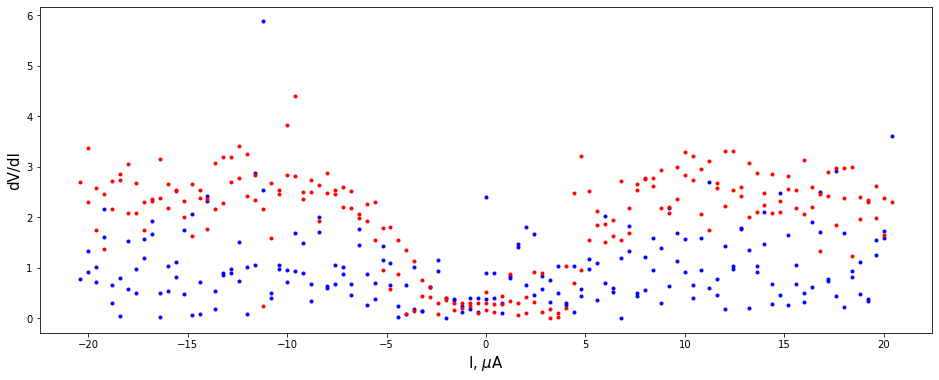

In [4]:
# Одно измерение 205 точек номер: от 0 до N_exp

M = 5

#поиск производной встроенной функцией
dx = I_2d[M][5]-I_2d[M][4]


dy = abs(diff(V_2d[M])/dx)

dV = [dy[0]]
dV = np.append(dV, dy)

fig, ax = plt.subplots(figsize=(16,6))
ax.set_xlabel(r'I, $\mu$A' , fontsize=15)
ax.set_ylabel('dV/dI', fontsize=15)
ax.plot(I_2d[M], dV ,  ".", color = 'blue')

#поиск производной функцией curve_fit

def fit_func(x,a,b):
    return a*x+b

dy_c = []
step = 6 # ДОЛЖЕН БЫТЬ БОЛЬШЕ 5

for i in range(0, N_in):
    Work_x = []
    Work_y = []


    if step>5: 
        if (N_in-i)<=step:
            step = N_in-i  
        
        for s in range (0, step-1): 
            Work_x = np.append(Work_x, I_2d[M][i+s])
            Work_y = np.append(Work_y, V_2d[M][i+s])

        [a, b] = curve_fit(fit_func, Work_x, Work_y)[0]
        dy_c = np.append(dy_c, abs(a))
    else: 
        dy_c = np.append(dy_c, dy_c[i-1])

    
dV_control = dy_c/dx
ax.plot(I_2d[M], dV_control ,  ".", color = 'red')


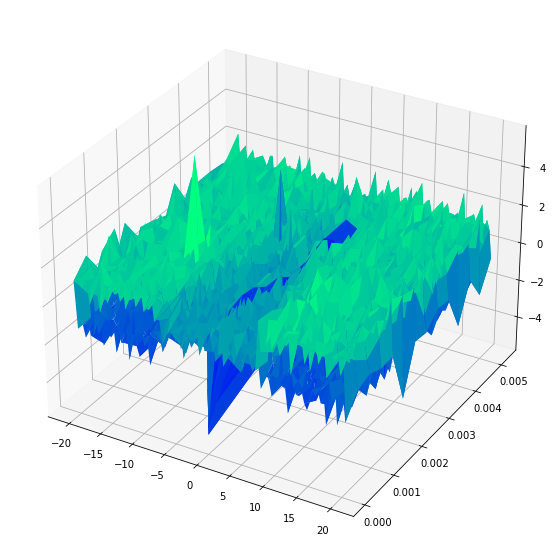

In [5]:
# I_2d[exp][points] 3D для встроенной функции

dx = I_2d[1][5]-I_2d[1][4]

dy = []
for m in range (0, N_exp-1):
        dy = diff(V_2d[m])/dx

        dV = [dy[0]]
        dV = np.append(dV, dy)

        dV_dI[m] = dV

fig = plt.figure(figsize=(17,10))

ax = plt.axes(projection='3d')
ax.plot_surface(I_2d, H_2d, dV_dI, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')    
plt.show()

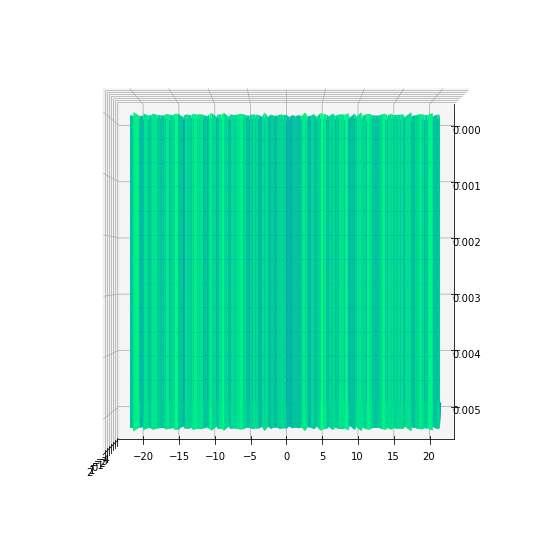

In [6]:
# 3D для curve_fit 


def fit_func(x,a,b):
    return a*x+b

def control_deff(x, y, step): 
    
    dy_c = []
    for i in range(0, N_in):
        Work_x = []
        Work_y = []


        if step>5: 
            if (N_in-i)<=step:
                step = N_in-i  

            for s in range (0, step-1): 
                Work_x = np.append(Work_x, x[i+s])
                Work_y = np.append(Work_y, y[i+s])

            [a, b] = curve_fit(fit_func, Work_x, Work_y)[0]
            dy_c = np.append(dy_c, abs(a))
        else: 
            dy_c = np.append(dy_c, dy_c[i-1])
    return dy 
    

    
# проход по всем вахам
#ШАГ НЕ МОЖЕТ БЫТЬ МЕНЬШЕ 5

for m in range (0, N_exp-1):

    dY = control_deff(I_2d[m], V_2d[m], 6)

    dV = [dy[0]]
    dV_control = np.append(dV, dY)

    dV_dI[m] = dV_control

fig = plt.figure(figsize=(10,10)) 


ax = plt.axes(projection='3d')
ax.plot_surface(H_2d, I_2d,  dV_dI, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')    
ax.view_init(90, 0)
    
plt.show()